# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

Time series modeling has proven to be an effective technique in predicting and forecasting various phenomena and variables in a wide range of industries and sectors. One of the fields in which time series modeling has found significant application is in the forecasting of wind and solar energy production.

Wind and solar energy production is highly dependent on climatic and environmental conditions, making it a variable that can show seasonal patterns and long-term trends. Furthermore, renewable energy production is subject to daily and seasonal variations due to sunlight availability and wind speed, making accurate prediction of these variables crucial for the efficient planning and operation of renewable energy plants. .

Time series modeling is based on the idea that the future values of a variable depend on its past values, seasonal patterns, and trends. Using statistical and mathematical techniques, time series models can capture and model these patterns and trends, enabling accurate forecasts of wind and solar energy production.

These models can take into account factors such as seasonal variability, long-term trends, repetitive cycles and relationships between different variables, such as wind speed and solar radiation. Additionally, the inclusion of exogenous variables, such as climate data, special events, or changes in energy policies, can further improve forecast accuracy.

Accurate forecasting of wind and solar energy production has multiple practical applications. For example, power plant operators can use these forecasts to optimize power generation, plan equipment maintenance, and manage power load efficiently. Additionally, utility providers and regulators can use these forecasts to forecast renewable energy supply and demand, allowing them to make informed decisions about integrating and managing these sources into the power grid.

In summary, time series modeling applied to wind and solar energy production forecasting offers a robust and effective approach to predicting variations in renewable energy generation. By taking advantage of historical patterns and trends, as well as incorporating relevant exogenous variables, it is possible to obtain accurate forecasts that help optimize the planning and operation of renewable energy plants, and facilitate the transition towards a more sustainable and clean energy matrix. .

<a id="2"></a>
# **Case study**

In this case study, we will discuss how time series modeling can be applied to forecast wind and solar energy production in a given region. The goal is to develop a model that can accurately predict renewable energy generation, allowing power plant operators and utility providers to plan and operate efficiently.

To conduct this study, historical wind and solar energy production data in megawatts (MW) was collected over a period of several years. This data includes regular measurements of energy production at specific time intervals, such as hours or days.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Sales Forecast.

The objective of this case study is to evaluate the performance of different time series models for forecasting wind and solar energy production.

Two types of approaches will be carried out for each process, one only with the objective variable, and another with exogenous variables, and the results will be compared.

However, it is important to note that time series models can be sensitive to changes in the structure of the time series. Therefore, it is advisable to evaluate the performance of models with historical data before using them to generate forecasts.

## Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#de99ff',  # #212946  '#99FFDE', '#ffde99', '#de99ff'
    'axes.facecolor': '#de99ff',
    'savefig.facecolor': '#de99ff',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## What About the Data ?

This dataset consists of wind 💨 and solar ☀️ energy production (in MW)⚡️ records on an hourly basis for the French grid since 2020. Its primary purpose is to enable the Commission de Régulation de l'Énergie (CRE) to calculate the reference price used in the calculation of additional remuneration for the wind and solar sectors.

The additional remuneration is a support mechanism for wind and solar energy producers, as defined in Articles L. 314-18 to L. 314-27 of the Energy Code. This mechanism was introduced by the Law on Energy Transition for Green Growth (LTECV). It allows renewable energy producers who directly market their electricity to receive a premium that compensates for the difference between their income from sales and a reference remuneration level. The reference remuneration is fixed by public authorities through a tariff decree or by the producer through a competition procedure, depending on the type of installation.

This additional compensation is generally classified as a variable bonus, or ex post, as its amount is adjusted to account for the variance between the reference compensation and the actual income derived from the market. The system's main objective is to expose producers to short-term market price signals while ensuring they receive reasonable remuneration for their renewable energy production.

- Date and Hour:Date and Hour range
- Date: Day date granularity
- StartHour: Recording Start Hour
- EndHour: Recording End Hour
- Source: Production Source (Wind or Solar)
- Production: Production (in MWh)
- dayOfYear: Day of the Year
- dayName: Day Name
- monthName: Month Name

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/intermittent-renewables-production-france.csv", parse_dates=["Date"]).drop(columns=["Date and Hour"])
df

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...
59801,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In this case we are going to use pm2_5 as the target variable.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"Date": "ds", "Production": "y"})


In [5]:
df=df.sort_values(by=["ds","StartHour"])

In [6]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,ds,StartHour,EndHour,Source,y,dayOfYear,dayName,monthName,unique_id
36164,2022-03-27,02:00:00,03:00:00,Solar,NaN,86,Sunday,March,1
39321,2022-03-27,02:00:00,03:00:00,Wind,NaN,86,Sunday,March,1


In [7]:
df = df.fillna(method="ffill")
df.iloc[null_rows.index]

,ds,StartHour,EndHour,Source,y,dayOfYear,dayName,monthName,unique_id
35785,2022-02-23,10:00:00,11:00:00,Solar,3096.0,54,Wednesday,February,1
39154,2022-04-30,04:00:00,05:00:00,Solar,1.0,120,Saturday,April,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59806 entries, 172 to 59522
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         59806 non-null  datetime64[ns]
 1   StartHour  59806 non-null  object        
 2   EndHour    59806 non-null  object        
 3   Source     59806 non-null  object        
 4   y          59806 non-null  float64       
 5   dayOfYear  59806 non-null  int64         
 6   dayName    59806 non-null  object        
 7   monthName  59806 non-null  object        
 8   unique_id  59806 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 4.6+ MB


In [9]:
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day

<a id="3"></a>
# **Explore Data with the plot method**

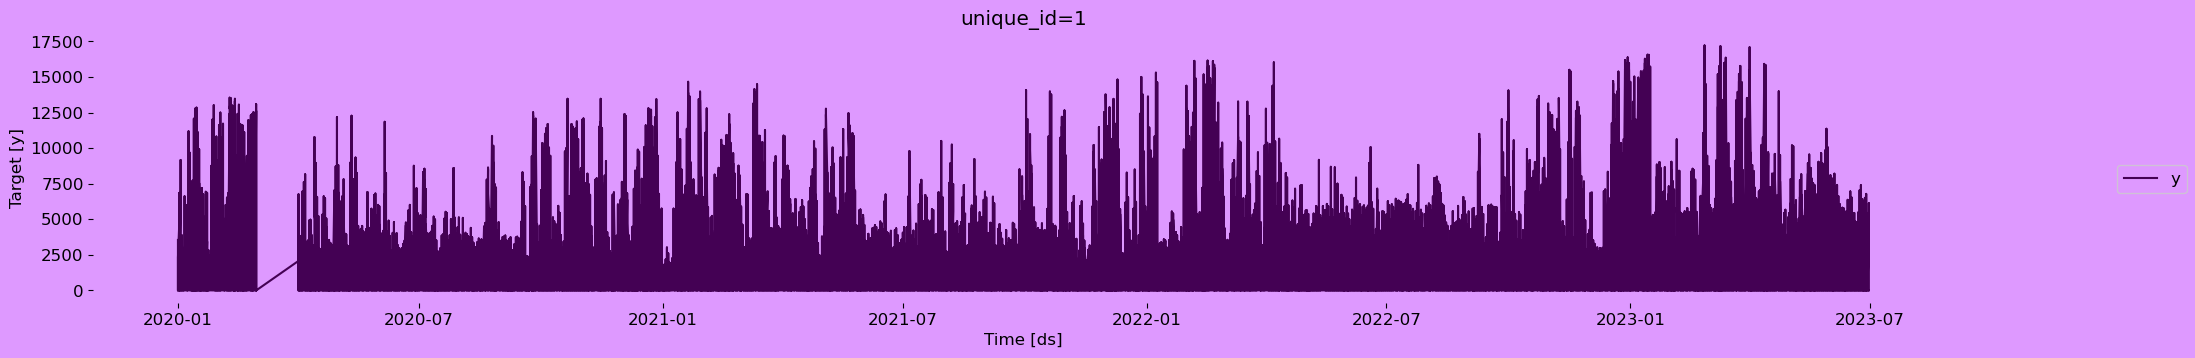

In [10]:
plot_series(df)

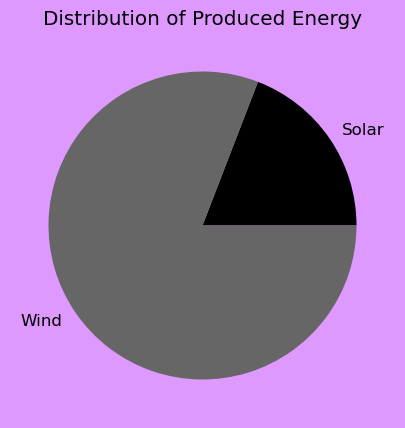

In [12]:
total_production_by_source = df.groupby('Source')['y'].sum().reset_index()

data = total_production_by_source['y']
labels = total_production_by_source['Source']
plt.figure(figsize=(18, 5))
plt.pie(data, labels=labels, autopct='%.0f%%')

plt.title('Distribution of Produced Energy')

plt.show()

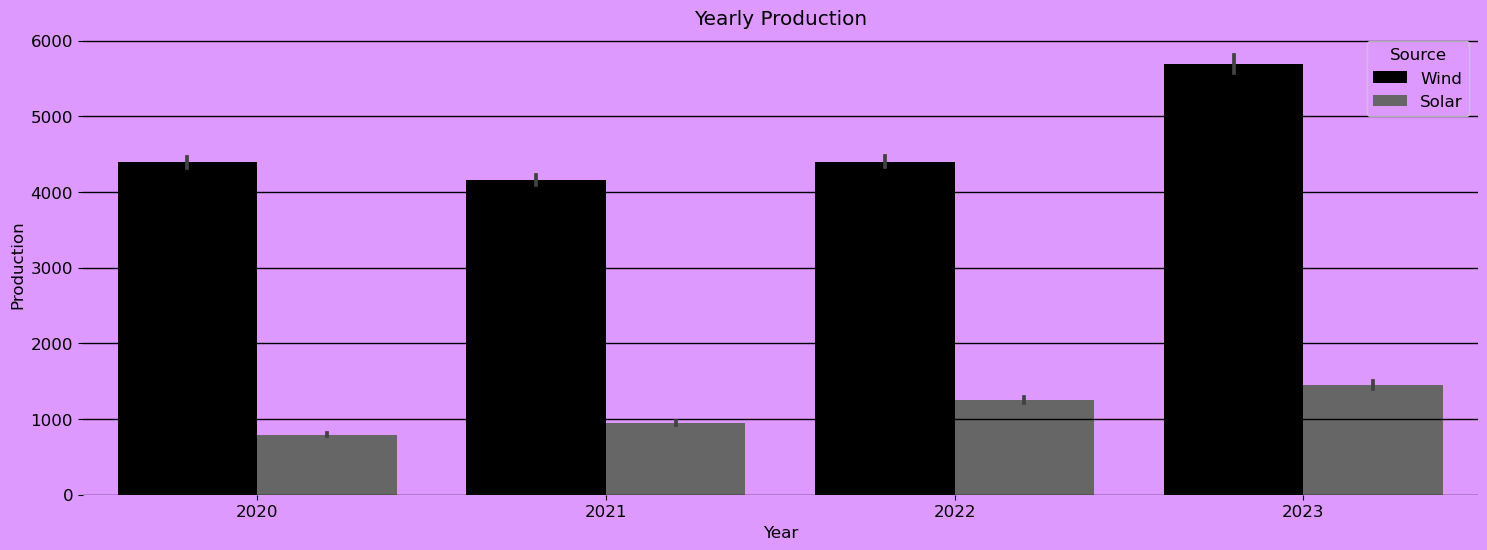

In [13]:
plt.figure(figsize=(18, 6))
sns.barplot(data=df, x="Year", y="y", hue="Source")
plt.title("Yearly Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

Based on the plot above, we conclude that the source of a large proportion of renewable energy produced yearly is mainly wind. Also, we can observe a positive energy production rate in both sources as years pass.

Note: the second half of the year 2023 hasn't arrived yet, therefor it hasn't been recorded yet.

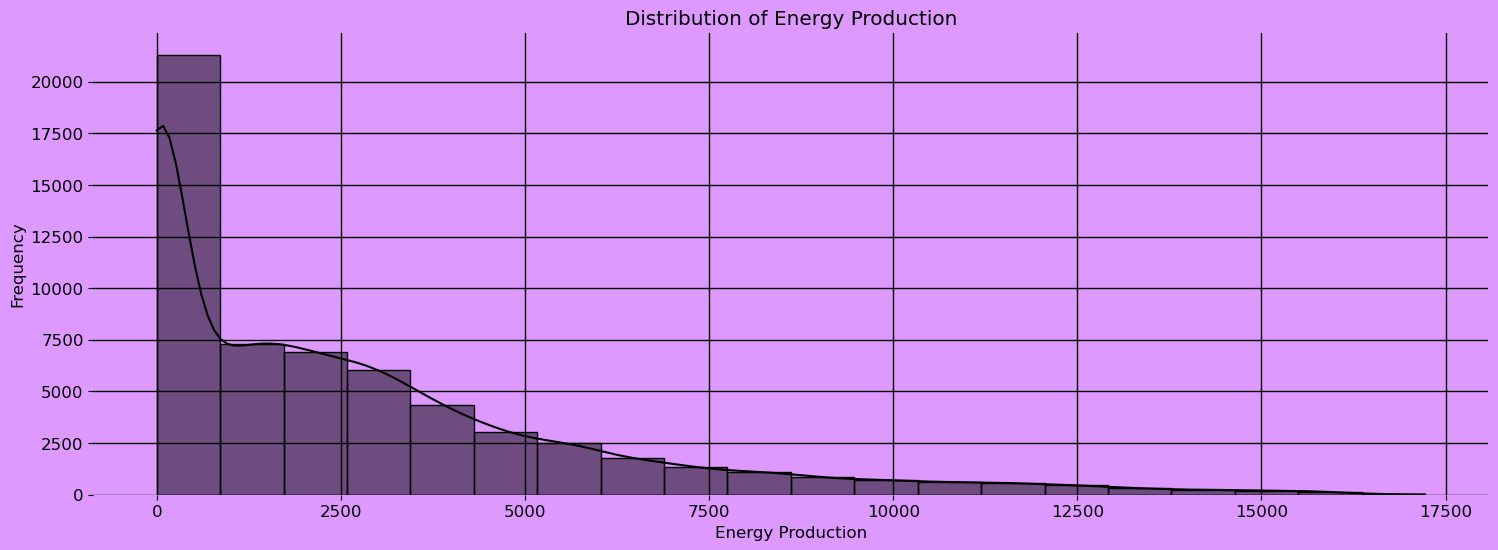

In [14]:
plt.figure(figsize=(18, 6))
sns.histplot(df['y'], bins = 20, kde = True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of energy production is heavily skewed to the right, with most of the production values close to zero. This indicates that there are many time periods with low or no energy production, which is typical for intermittent renewable energy sources like solar power that depend on environmental conditions.

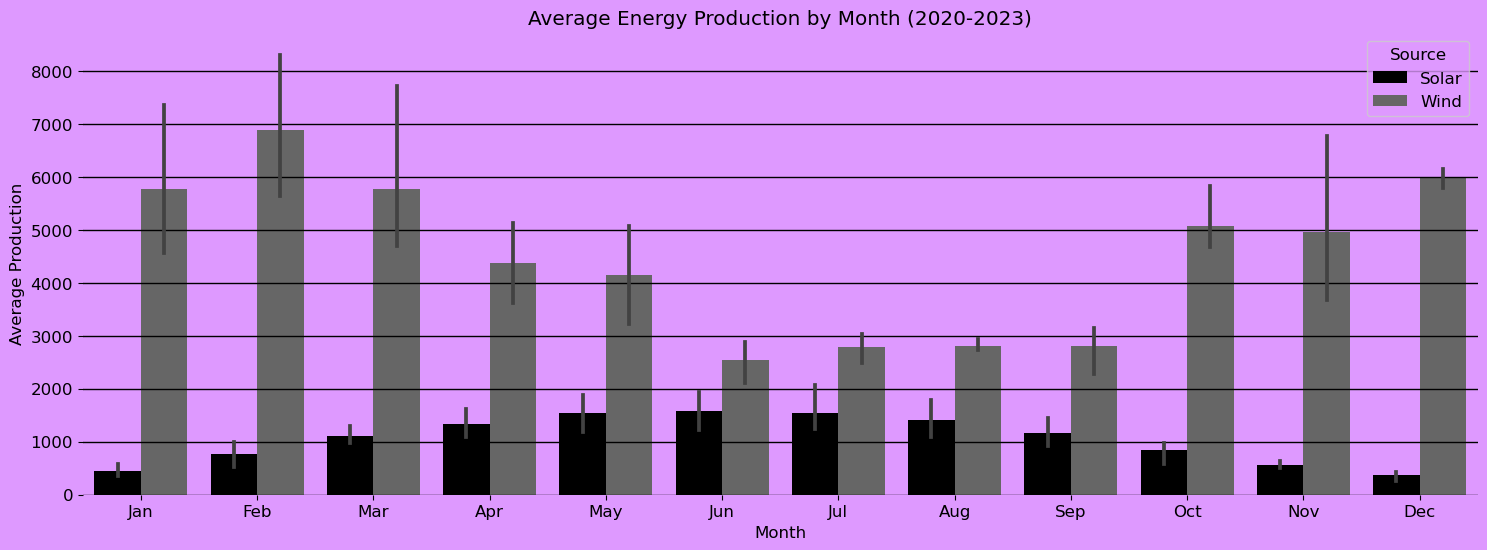

In [15]:
monthly_avg_production = df.groupby(['Year', 'Month', 'Source'])['y'].mean().reset_index()

# Define the months as labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(data=monthly_avg_production, x='Month', y='y', hue='Source')

plt.xlabel('Month')
plt.ylabel('Average Production')
plt.title('Average Energy Production by Month (2020-2023)')
plt.xticks(np.linspace(0,11,12),labels=months)
plt.show()

How Wind and Solar Produce Energy on Average though a day

And how the production varies depending on the month

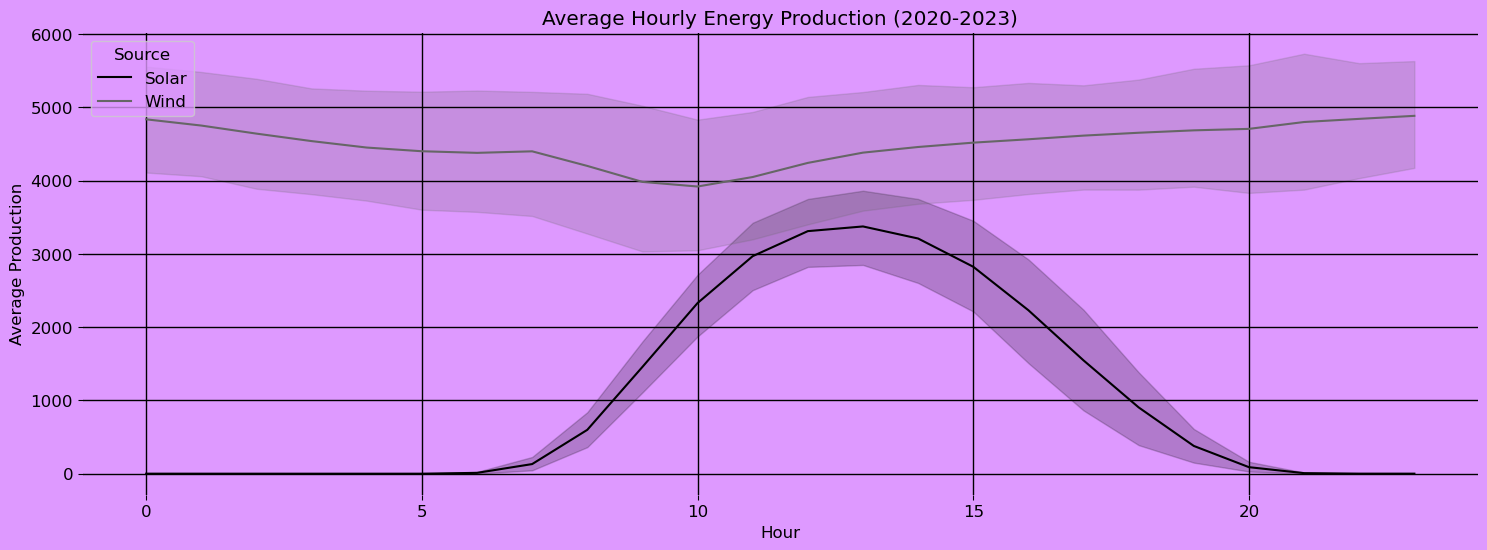

In [16]:
df['Hour'] = pd.to_datetime(df['StartHour'], format='%H:%M:%S').dt.hour

hourly_avg_production = df.groupby(['Hour', 'Month', 'Source'])['y'].mean().reset_index()

fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(data=hourly_avg_production, x='Hour', y='y', hue='Source')

plt.xlabel('Hour')
plt.ylabel('Average Production')
plt.title('Average Hourly Energy Production (2020-2023)')
plt.show()

Does Energy Production Varies by Days of Week?

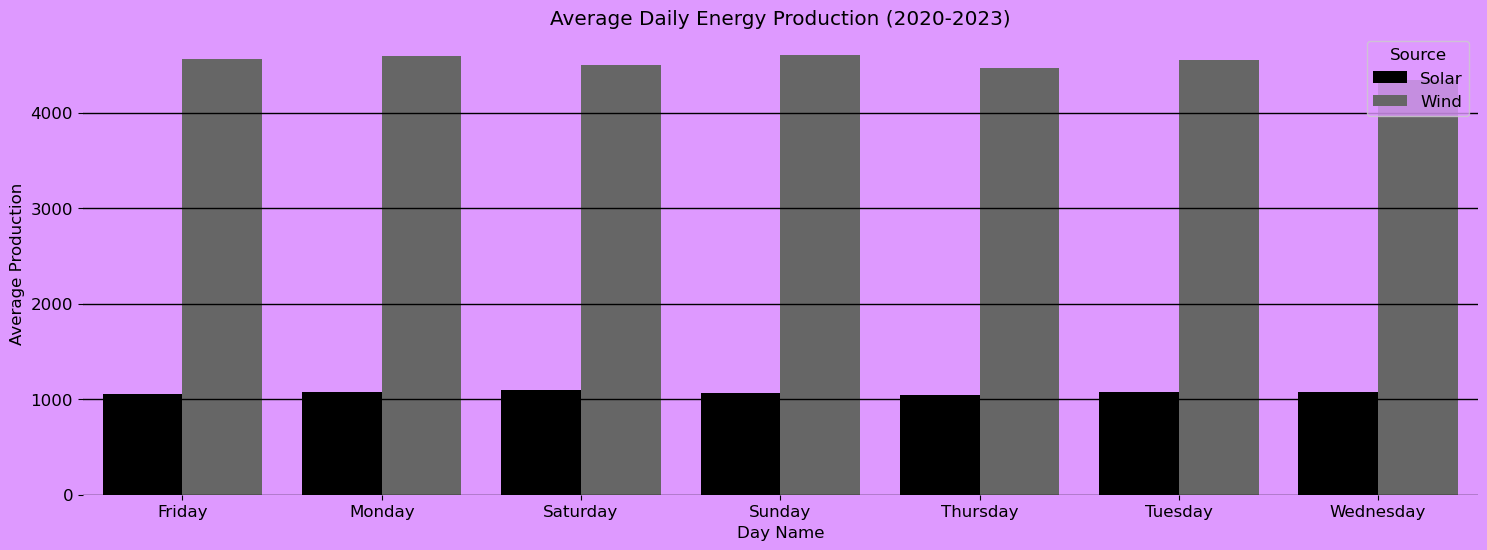

In [17]:
daily_avg_production_by_week_day = df.groupby(['dayName', 'Source'])['y'].mean().reset_index()

fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(data=daily_avg_production_by_week_day, x='dayName', y='y', hue='Source')

plt.xlabel('Day Name')
plt.ylabel('Average Production')
plt.title('Average Daily Energy Production (2020-2023)')
plt.show()

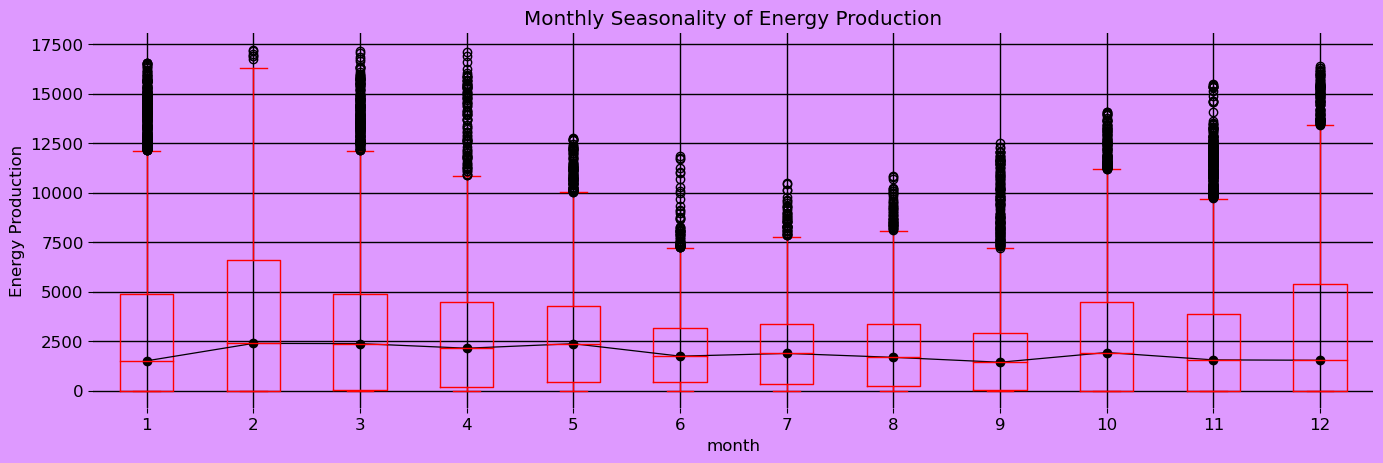

In [18]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df['month'] = df['ds'].apply(lambda x: x.month)
df.boxplot(column="y", by='month', ax=ax, color="red")
df.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Energy Production')
ax.set_title('Monthly Seasonality of Energy Production')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

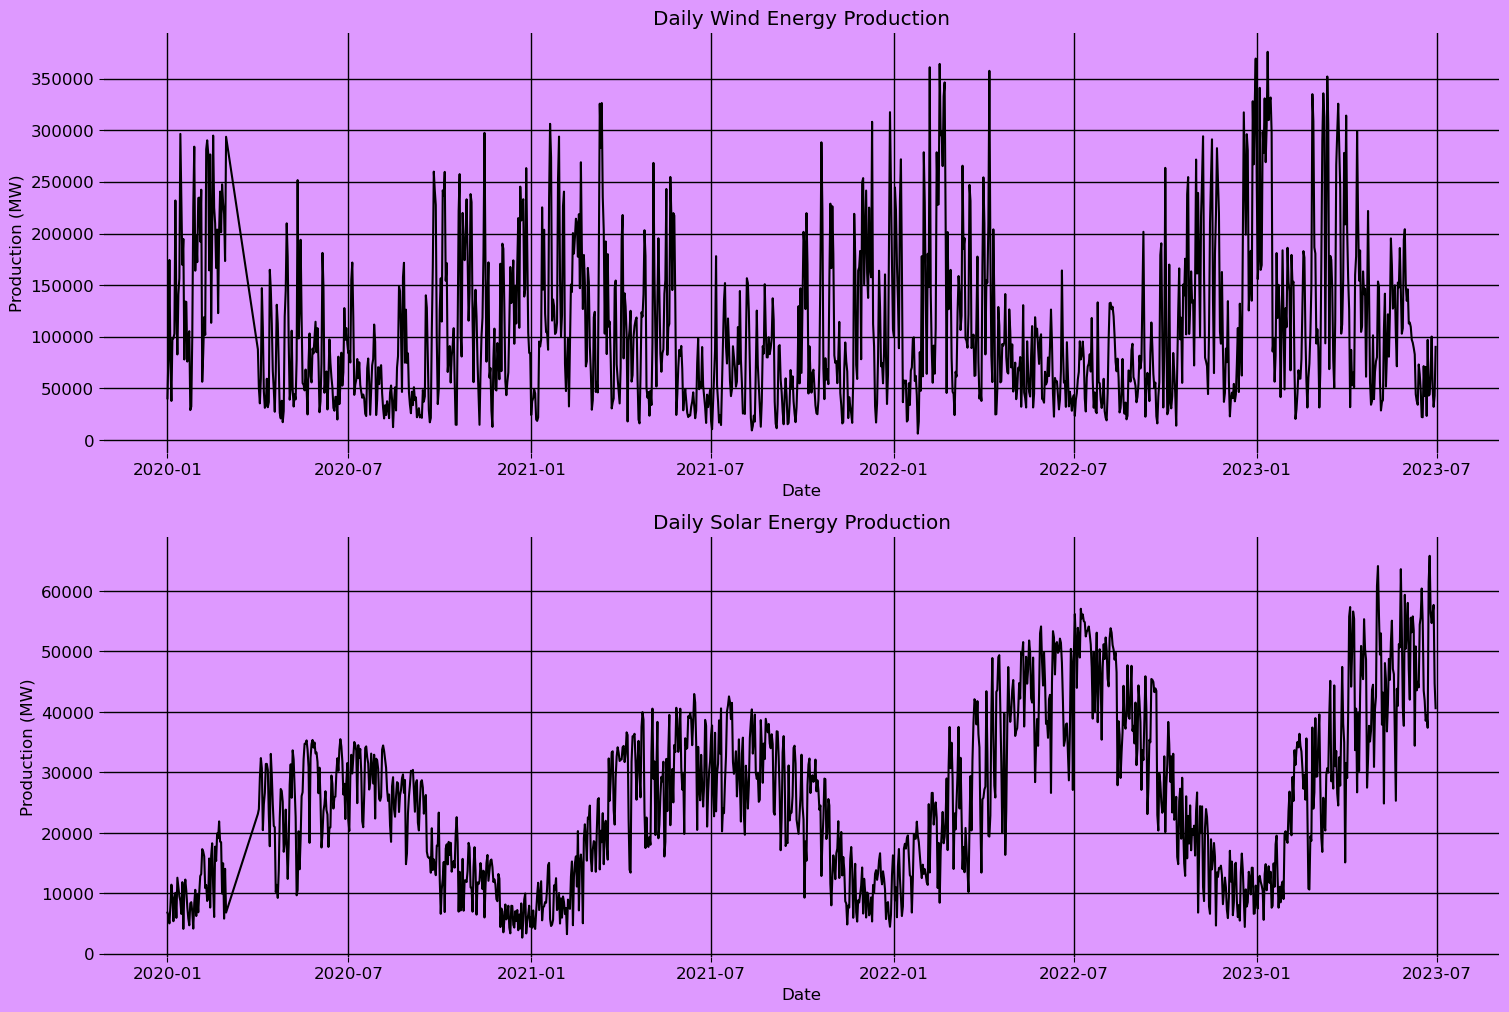

In [19]:
daily_production = df.groupby(by=["Source","ds"]).y.sum().reset_index()
daily_production["ds"] = pd.to_datetime(daily_production["ds"])

plt.figure(figsize=(18, 12))

plt.subplot(2, 1, 2)

plt.subplot(2, 1, 1)
plt.title("Daily Wind Energy Production")
sns.lineplot(data=daily_production[daily_production.Source=="Wind"], x="ds", y="y",)
plt.xlabel("Date")
plt.ylabel("Production (MW)")

plt.subplot(2, 1, 2)
plt.title("Daily Solar Energy Production")
sns.lineplot(data=daily_production[daily_production.Source=="Solar"], x="ds", y="y")
plt.xlabel("Date")
plt.ylabel("Production (MW)")

plt.show()

## **Add lag**

In [20]:
data=df.groupby("ds")[["y"]].sum().reset_index()
data["unique_id"]="1"

In [21]:
for i in range(1, 5):
    data[f'lag_{i}'] = data['y'].shift(i)

In [22]:
data=data.dropna()
data

,ds,y,unique_id,lag_1,lag_2,lag_3,lag_4
4,2020-01-05,49358.0,1,84643.0,179425.0,89237.0,47253.0
5,2020-01-06,108335.0,1,49358.0,84643.0,179425.0,89237.0
6,2020-01-07,103744.0,1,108335.0,49358.0,84643.0,179425.0
7,2020-01-08,112049.0,1,103744.0,108335.0,49358.0,84643.0
8,2020-01-09,242065.0,1,112049.0,103744.0,108335.0,49358.0
...,...,...,...,...,...,...,...
1241,2023-06-26,154923.0,1,121739.0,109985.0,104567.0,134430.0
1242,2023-06-27,106178.0,1,154923.0,121739.0,109985.0,104567.0
1243,2023-06-28,89884.0,1,106178.0,154923.0,121739.0,109985.0
1244,2023-06-29,87766.0,1,89884.0,106178.0,154923.0,121739.0


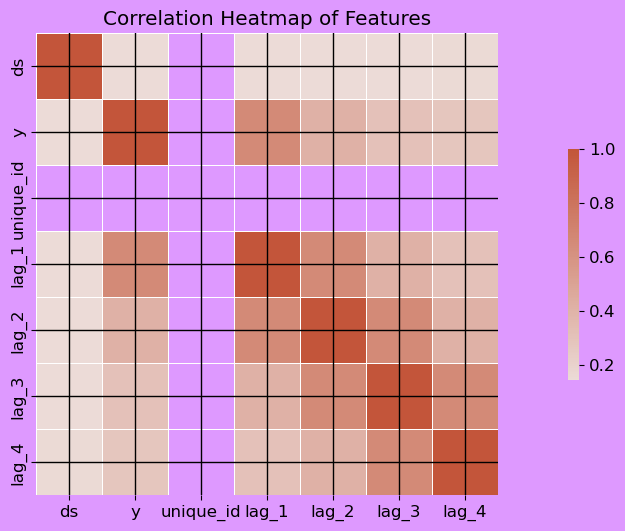

In [23]:
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, annot=False, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Features')
plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [24]:
df1=data[["ds","y","unique_id"]]
train = df1[df1.ds<='2023-05-31'] 
test=df1[(df1['ds'] > '2023-05-31')]

train.shape, test.shape

((1212, 3), (30, 3))

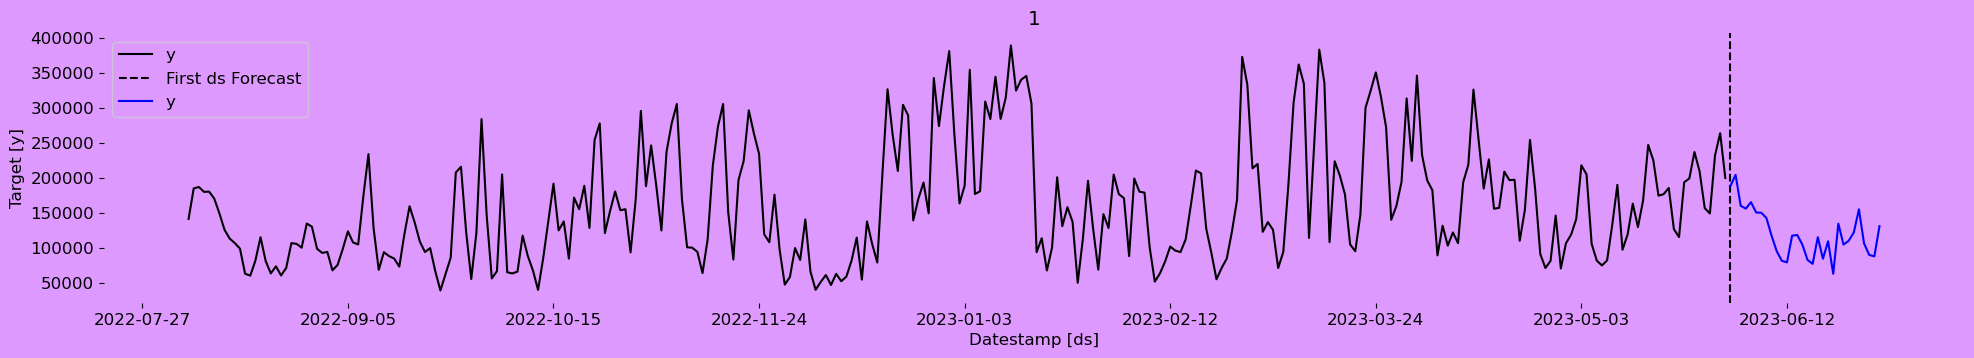

In [25]:
StatsForecast.plot(train, test,max_insample_length=300)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoARIMA, MSTL` model, using the `AutoARIMA, MSTL` function. This model will help us forecast user demand in the next 30 daily.

In [26]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,  MSTL

In [27]:
season_length = 7 # Daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          MSTL(
              season_length=[7,365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [28]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

In [29]:
sf.fit()

StatsForecast(models=[AutoARIMA,SeasonalNaive,MSTL])

## **Predict Method**

In [30]:
Y_hat = sf.predict(horizon)
Y_hat.head()

,ds,AutoARIMA,SeasonalNaive,MSTL
unique_id,,,,
1,2023-06-01,181587.406250,236640.0,153791.296875
1,2023-06-02,177731.765625,209026.0,168476.687500
1,2023-06-03,175981.812500,156584.0,109112.843750
1,2023-06-04,175187.562500,149010.0,76228.304688
1,2023-06-05,174827.078125,231765.0,101935.734375


## **Forecasting Plot**

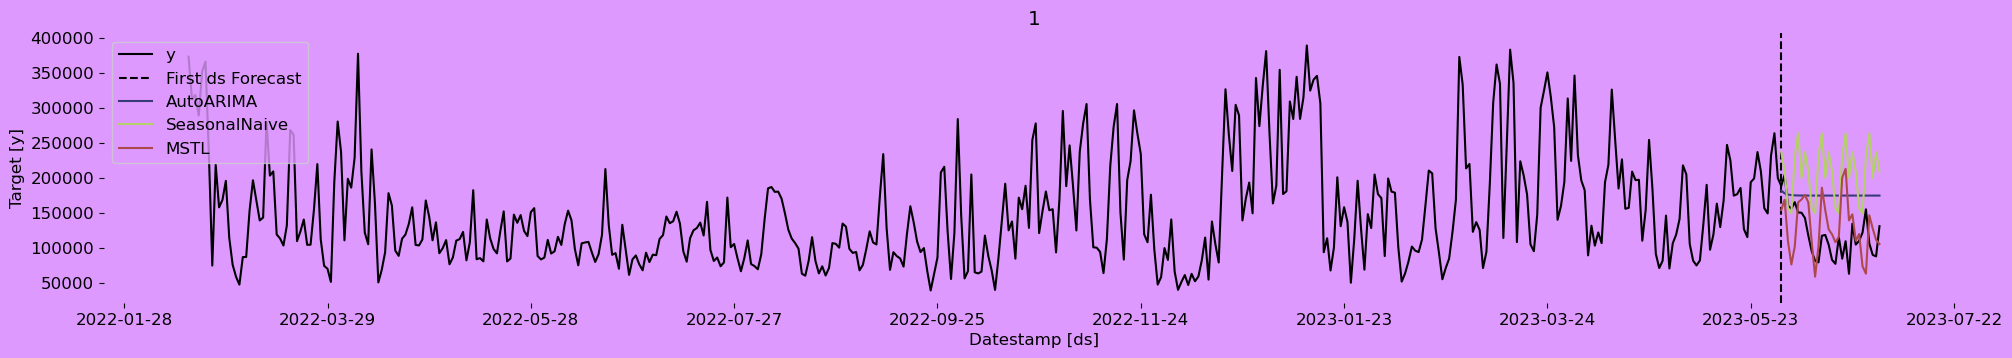

In [31]:
StatsForecast.plot(data, Y_hat, max_insample_length=500, )

<a id="6"></a>
# **Evaluate the model**

In [32]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [33]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [34]:
print(evaluate_performace(train, test,Y_hat.reset_index() , models=[ "SeasonalNaive", "AutoARIMA",  "MSTL",])
)

                   mase           mae       mape          rmse      smape
SeasonalNaive  1.183841  88287.900000  86.473810  99861.359497  54.675501
AutoARIMA      0.765623  57098.277604  58.798467  64204.508051  41.459868
MSTL           0.545235  40662.296875  36.933960  49771.742398  32.925058


<a id="7"></a>
# **Exogenous variables**
We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [35]:
exogen=data[['ds', 'unique_id', 'lag_1', 'lag_2', 'lag_3', 'lag_4']]
exogen

,ds,unique_id,lag_1,lag_2,lag_3,lag_4
4,2020-01-05,1,84643.0,179425.0,89237.0,47253.0
5,2020-01-06,1,49358.0,84643.0,179425.0,89237.0
6,2020-01-07,1,108335.0,49358.0,84643.0,179425.0
7,2020-01-08,1,103744.0,108335.0,49358.0,84643.0
8,2020-01-09,1,112049.0,103744.0,108335.0,49358.0
...,...,...,...,...,...,...
1241,2023-06-26,1,121739.0,109985.0,104567.0,134430.0
1242,2023-06-27,1,154923.0,121739.0,109985.0,104567.0
1243,2023-06-28,1,106178.0,154923.0,121739.0,109985.0
1244,2023-06-29,1,89884.0,106178.0,154923.0,121739.0


# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [36]:
train_exo = data[data.ds<='2023-05-31'] 
test_exo=exogen[(exogen['ds'] > '2023-05-31')]

train_exo.shape, test_exo.shape

((1212, 7), (30, 6))

<a id="9"></a>
# **Implementation of StatsForecast with exogenous variables**

In [37]:
season_length = 7 # Daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length),
          MSTL(
              season_length=[7,365], # seasonalities of the time series 
              trend_forecaster=AutoARIMA() )# model used to forecast trend
          ]

In [38]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='D', 
    n_jobs=-1)

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [39]:
sf_exo.fit(train_exo,test_exo)

StatsForecast(models=[AutoARIMA,SeasonalNaive,MSTL])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [40]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo.head()

,ds,AutoARIMA,SeasonalNaive,MSTL
unique_id,,,,
1,2023-06-01,181247.578125,236640.0,152775.546875
1,2023-06-02,188028.859375,209026.0,171107.328125
1,2023-06-03,199830.437500,156584.0,111927.921875
1,2023-06-04,156967.515625,149010.0,76554.632812
1,2023-06-05,166333.828125,231765.0,102674.507812


## **Forecasting Plot**

In [41]:
actual_exo=data[data.ds>'2023-05-31'] 

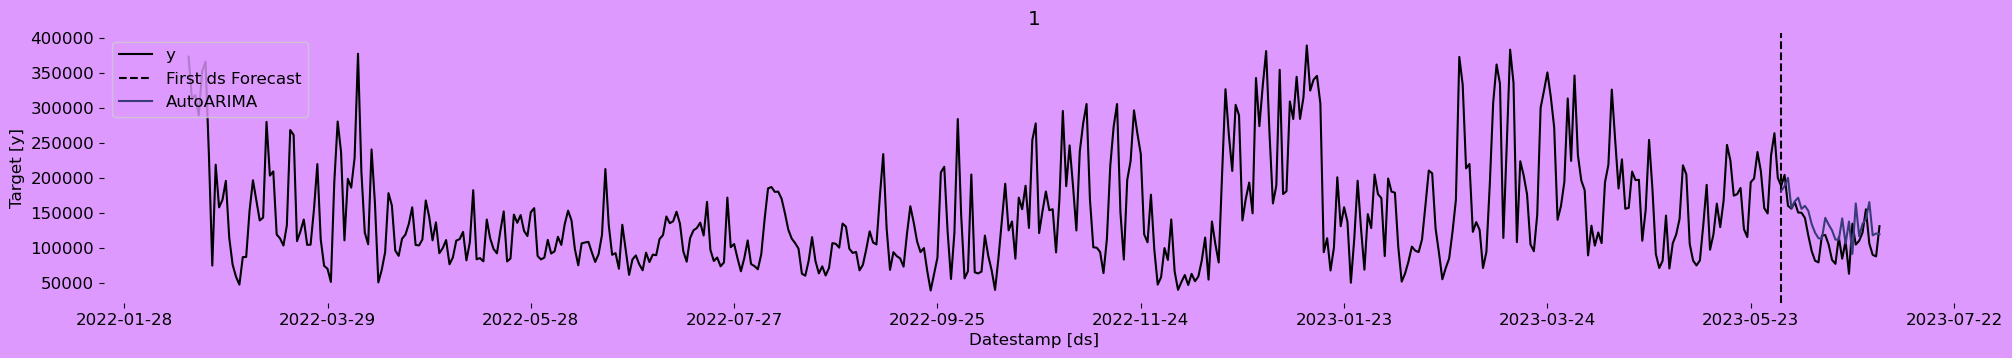

In [42]:
StatsForecast.plot(data, Y_hat_exo, max_insample_length=500, models=["AutoARIMA"])

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [43]:
print("No exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["SeasonalNaive", "AutoARIMA",  "MSTL",])
)
print("======"*10)
print("With exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() ,models=["SeasonalNaive", "AutoARIMA",  "MSTL",]))

No exogenous variable
                   mase           mae       mape          rmse      smape
SeasonalNaive  1.183841  88287.900000  86.473810  99861.359497  54.675501
AutoARIMA      0.765623  57098.277604  58.798467  64204.508051  41.459868
MSTL           0.545235  40662.296875  36.933960  49771.742398  32.925058
With exogenous variable
                   mase           mae       mape          rmse      smape
SeasonalNaive  1.183841  88287.900000  86.473810  99861.359497  54.675501
AutoARIMA      0.355857  26538.957031  27.236697  32984.673405  22.392764
MSTL           0.534962  39896.109115  36.206370  49130.895433  32.405447


<a id="11"></a>
# **Conclusion**

The analysis provides results from three models used to forecast solar and wind energy production, both with and without exogenous variable. The models evaluated are SeasonalNaive, AutoARIMA and MSTL. Next, the results will be analyzed in terms of different forecast evaluation metrics.

Without exogenous variable:
- SeasonalNaive: This model shows lower performance compared to the other two models evaluated. The mase, mae, mape, rmse and smape metrics indicate higher error compared to AutoARIMA and MSTL. This suggests that SeasonalNaive does not adequately fit solar and wind energy production data and provides less accurate forecasts.
- AutoARIMA: The results indicate that this model has improved performance compared to SeasonalNaive. The mase, mae, mape, rmse, and smape metrics indicate lower error, suggesting that AutoARIMA can better fit historical data and provide more accurate forecasts.
- MSTL: This model shows the best performance compared to SeasonalNaive and AutoARIMA. The metrics of mase, mae, mape, rmse and smape indicate a lower error compared to the other two models. This suggests that MSTL can more effectively capture seasonal patterns and trends in solar and wind energy production data, resulting in more accurate forecasts.

With exogenous variable:
- SeasonalNaive: The results are identical to those obtained without exogenous variable, which indicates that the inclusion of an additional variable does not significantly affect the performance of this model.
- AutoARIMA: The performance of this model improves significantly when an exogenous variable is added. The mase, mae, mape, rmse and smape metrics show a considerable reduction compared to the model without exogenous variable, suggesting that the inclusion of this variable improves the forecast accuracy.
- MSTL: Although this model shows slightly lower performance compared to AutoARIMA with exogenous variable, it is still superior to SeasonalNaive. The metrics of mase, mae, mape, rmse and smape indicate a lower error compared to the other two models.

To improve the performance of time series models for forecasting wind and solar energy production, it is recommended to use the following methods:

- Incorporate meteorological variables: Meteorological variables, such as wind speed and solar radiation, can help improve the accuracy of forecasts.
- Use more complex models: More complex models, such as machine learning models, may be better suited for time series with complex structures.
- Use cross-validation techniques: Cross-validation techniques can help select the most appropriate model for a particular data set.


Overall, the results indicate that AutoARIMA and MSTL, especially when using an exogenous variable, offer better performance in terms of solar and wind energy production forecasting. These models fit historical data well and provide more accurate forecasts compared to SeasonalNaive. However, it is important to note that the analysis is based solely on the results provided, and no additional information is available about the data or methodology used in each model.

<a id="12"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)